# **Wetland Image Recognition**

###1.Introduction

Our research topic is about different land type recognition. It uses images from satellites or other sensors to train the classifier. We decided to use the dataset from NAIP. In this dataset, we can train our classifier to recognize the land types. Many deep learning methods can be applied to image recognition. Deep Neural Network (DNN) plays an important role. We plan to use DNN as a method to train the classifier and apply it to the use of land type recognition.

Wetland protection is one of the most important environmental protection topics. In the process of developing land, human beings will inevitably destroy the wetlands which exist for centuries in the environment. It is important to observe and record the changes in wetlands since it is an important area of current research. 
It is useful and necessary to use deep neural network methods in image processing. We combine what we learned from the class and decide to use a deep neural network.
CNN is a deep learning approach to achieve multi-classification. Although this algorithm is time consuming, high accuracy make it a great approach when provided with sufficient training data. 

This project uses a deep neural network for training a multi-class classifier on a dataset from NAIP. After we train multiple classifiers for the dataset, it can distinguish a difference between wetland and non-wetland so that it can better identify land changes. The analysis results can be used as a reference for government decision-making, and can also be used as materials for scientists. Scientists can use it to measure the change of natural environment and wetland conditions in a region.


### 2.Import required libraries

In [0]:
import numpy as np 
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import keras
from keras import Model
from keras.layers import Dense, Conv2D, pooling, Activation, BatchNormalization, Input, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, f1_score

import matplotlib.pyplot as plt
from IPython.display import clear_output

###3.Data Preparation
Our dataset is based on NAIP images. We extracted the image from NAIP and get the wetland and non-wetland patches. There are 120,000 non-wetland patches and 122,383 wetland patches. We use 90,000 non-wetland patches and 97,906 wetland patches to train the classifier, and use the rest patches for test. Each patches is a 28 * 28 picture with 4 dimensions(R,G,B and NIR).

Firstly, let's load the data and see how is it structured.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/DeepLearning')
import data_loader

root_path ='gdrive/My Drive/DeepLearning/dataset/'
(x_train,y_train,x_test,y_test)=data_loader.LoadData(root_path)

print(f'train data shape: {x_train.shape}')
print(f'test data shape: {x_test.shape}')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
train data shape: (187906, 28, 28, 4)
test data shape: (54477, 28, 28, 4)


Here's an example of the Wetland patch.

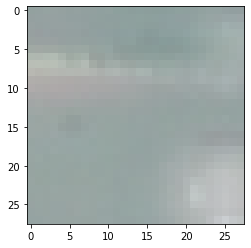

In [3]:
plt.imshow(x_train[1])

Before going to the training part, we need to normalize our data, so that they get a value between 0 and 1.

This step will make the model train more efficiently as it will reduce the variance in the dataset distribution, so the activations of different examples won't have big differences.

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### 4.LeNet-5 implementation
In this project, the [LeNet-5 model](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) which we adopted was based on the algorithm in this paper from Yann LeCun et al.
The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.
Let's train this model with SGD.

In [5]:
import LeNet5
optimizer=LeNet5.LeNet5(x_train,y_train,x_test,y_test)
#hyperparameters
lr=0.01
decay=1e-6
momentum=0.9
batch_size=128
epochs=12

optimizer.train(lr,decay,momentum,batch_size,epochs)

Training on  187906 samples with SGD
learning rate: 0.01 ,weight_decay: 1e-06 ,momentum: 0.9 ,batch_size: 128
Epoch 1/12
187906/187906 [==============================] - 9s 48us/step - loss: 0.4444 - acc: 0.7950
Epoch 2/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2567 - acc: 0.9041
Epoch 3/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2359 - acc: 0.9131
Epoch 4/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2278 - acc: 0.9165
Epoch 5/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2260 - acc: 0.9173
Epoch 6/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2143 - acc: 0.9216
Epoch 7/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2121 - acc: 0.9226
Epoch 8/12
187906/187906 [==============================] - 7s 37us/step - loss: 0.2042 - acc: 0.9255
Epoch 9/12
187906/187906 [==============================] - 7s 37us/step -

After training, we can evaluate the model and plot a confusion martix using seaborn:

Test on 54477 samples
54477/54477 [==============================] - 3s 58us/step
Test loss: 0.4414592295253776
Test accuracy: 0.8270646327819007
Don't use as a metric - Original Training Dataset Accuracy: 93.163%
Test Dataset Accuracy: 82.706%


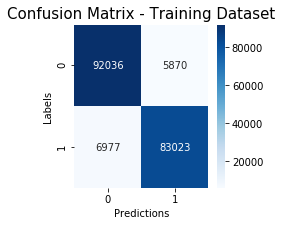

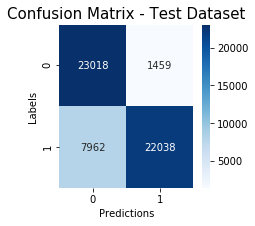

In [6]:
optimizer.test()

### 5.Our customed implementation

Though the well celebrated LeNet-5 can provide us with an acceptable result, we still seek some way to improve the accuracy and proposed our customed neural networks (which is MyNet in this notebook).
After trying many architectures, the final one we adopted is:

*   Input  
↓  
*   3 convolution layers  
↓  
*   2*2 max pooling  
↓  
*   3 convolution layers  
↓  
*   Flatten layer  
*   Dropout  
↓  
*   Fully-Connected Layer  
*   BatchNormalization  
*   Dropout  
*   ReLU  
↓  
*   Fully-Connected Layer  
↓  
*   Output

The idea comes from [a kaggle discussion.](https://www.kaggle.com/masfour/99-7-accuracy-top-10-digit-classifier-tutorial)

Let's train this model with SGD.



In [7]:
import MyNet
optimizer=MyNet.MyNet(x_train,y_train,x_test,y_test)
#hyperparameters
lr=0.1
decay=1e-6
momentum=0.9
batch_size=96
epochs=12

optimizer.train(lr,decay,momentum,batch_size,epochs)

Training on  187906 samples with SGD
learning rate: 0.1 ,weight_decay: 1e-06 ,momentum: 0.9 ,batch_size: 96


/content/gdrive/My Drive/DeepLearning/MyNet.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="uniform")`
  self.model.add(Dense(128, init='uniform'))
/content/gdrive/My Drive/DeepLearning/MyNet.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform")`
  self.model.add(Dense(256, init='uniform'))


Epoch 1/12
187906/187906 [==============================] - 21s 112us/step - loss: 0.5147 - acc: 0.7364
Epoch 2/12
187906/187906 [==============================] - 20s 109us/step - loss: 0.3144 - acc: 0.8773
Epoch 3/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.2686 - acc: 0.8989
Epoch 4/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.2435 - acc: 0.9116
Epoch 5/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.2255 - acc: 0.9194
Epoch 6/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.2142 - acc: 0.9249
Epoch 7/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.2070 - acc: 0.9272
Epoch 8/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.1991 - acc: 0.9299
Epoch 9/12
187906/187906 [==============================] - 20s 108us/step - loss: 0.1942 - acc: 0.9319
Epoch 10/12
187906/187906 [==============================] - 21s

After training, we can evaluate the model and plot a confusion martix using seaborn:

Test on 54477 samples
54477/54477 [==============================] - 5s 90us/step
Test loss: 0.3363119527364676
Test accuracy: 0.8842997962453807
Don't use as a metric - Original Training Dataset Accuracy: 93.556%
Test Dataset Accuracy: 88.43%


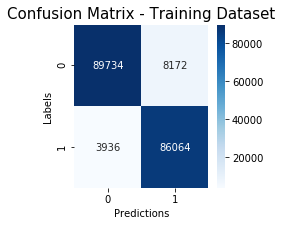

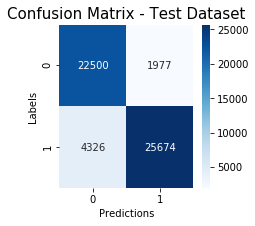

In [8]:
optimizer.test()

### 6.Conclusion

In this project, we implemented two classification models, the well celebrated LeNet-5 and our customed MyNet.   

According to our results, LeNet5 achieves 93.163% accuracy in training and 82.706% on testing, while MyNet achieves 93.556% in training but 88.43% in testing. So our MyNet get a better and acceptable result in the wetland and non-wetland dataset classification problem.

